In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as spc

In [2]:
########## Plotting functions for laziness ##########
plt.rcParams['font.size'] = 13.5

def plot(x, y, *args, xlabel=None, ylabel=None, title=None, **kwargs):
    plt.plot(x, y, *args, **kwargs)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

def plot_ax(ax, x, y, *args, xlabel=None, ylabel=None, title=None, **kwargs):
    ax.plot(x, y, *args, **kwargs)
    ax.grid(True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

## Meander

Quarter-wave line length
$$l = \frac{\lambda}{4}=\frac{c}{4f\sqrt{\epsilon}} = \frac{37.5}{\sqrt{\epsilon}}\approx 16.75 \text{ mm}$$

In [3]:
f = 2e9  # frequency in Hz
eps = 3.8  # relative permitivity of substrate (fused silica)
c = spc.c  # speed of light
v = c/np.sqrt(eps)  # velocity of wave in the media
lam = v/f  # wavelength in m 
l4 = lam/4  # length of quarter-wave line in m 

l4*1e3  # length in mm

19.22378575164986

General T-line equation
$$ Z_{in}(-l) = Z_0\frac{Z_L+jZ_0\tan(\beta l)}{Z_0+jZ_L\tan(\beta l)} $$
Shorted T-line input impedance 
$$Z_{in}(-l) = jZ_0\tan(\beta l)$$
$l$ is the length measured from the load, $Z_0$ is the char. impedance, $\beta = 2\pi/\lambda=\omega/v$ is called the electrical length.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


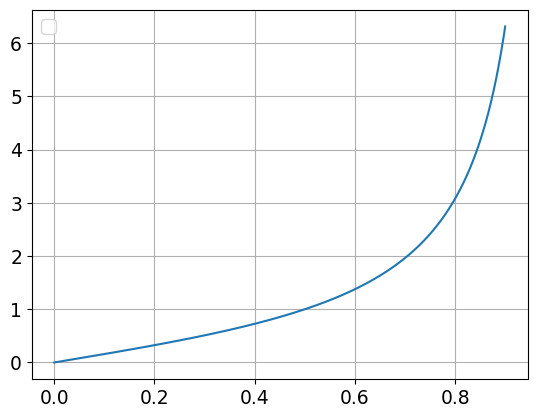

In [19]:
beta = 2*np.pi/lam 
Z0_4 = 100  # char. impedance of the quarter line
Z0 = 50  # char. impedance of the feedline
C = 0.4e-12
Zc = 1/(1j*beta*v*C)
l = np.linspace(0, l4*0.9, 1000000)
Zin = 1j*Z0_4*np.tan(beta*l)  # input impedance at a given location l

plot(l/l4, np.tan(beta*l))# abs(Zin), xlabel=r'$l$ ($\times L$)', ylabel=r'$|Z_{in}-Z_c|$')
i_min = np.argmin(abs(Zin-Zc))
#plt.plot(l[i_min]/l4, abs(Zin-Zc)[i_min], 'o', label=f'$l$ = {l[i_min]*1e3:.3f} mm')
plt.legend()
plt.show()

In [20]:
np.sqrt(50)

7.0710678118654755

## Spiral

In [2]:
def calc_spiral_len(W, N, D_gap):
    L = 0
    l = D_gap*2 + 2*W 
    lm = W + D_gap
    for i in range(1, N+1):
        L += l*i*4 - lm
        print(l*i)
    return L